In [1]:
#%%bash
#pip install git+https://github.com/Tokukawa/PortfolioAnalyzer.git

In [2]:
%matplotlib inline
from portfolio_analyzer.stocks_data_loader import yahoo2pandas
from portfolio_analyzer.optimizers import approximated_max_kelly, minimal_variance, risk_parity
from portfolio_analyzer.balancer import Rebalance
from portfolio_analyzer.backtest import NaiveBackTest
from portfolio_analyzer.metrics import MainMetrics

In [3]:
tickers = ['VTI', 'TLT', 'GLD']
data = yahoo2pandas(tickers, frequency='weekly')

In [4]:
data.head()

,GLD,TLT,VTI
formatted_date,,,
2004-11-15,44.779999,88.260002,56.974998
2004-11-22,45.290001,88.250000,57.700001
2004-11-29,45.599998,87.440002,58.174999
2004-12-06,43.439999,88.849998,58.000000
2004-12-13,44.189999,88.750000,58.599998


In [5]:
minimal_variance(data)

,GLD,TLT,VTI
0,0.15198,0.497285,0.350736


In [6]:
risk_parity(data)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.44265099234e-13
            Iterations: 18
            Function evaluations: 91
            Gradient evaluations: 18


,GLD,TLT,VTI
0,0.243992,0.420035,0.335973


In [7]:
approximated_max_kelly(data)

,GLD,TLT,VTI
0,0.253125,0.371098,0.375777


In [8]:
portfolio_exposure = {
    'VTI': 11, 
    'TLT': 22, 
    'GLD': 33
}

optimal_weights = {
    'VTI': 0.8, 
    'TLT': 0.1, 
    'GLD': 0.1
}

In [9]:
rebalancer = Rebalance(portfolio_exposure, optimal_weights, 123.)

In [10]:
new_exposure, balance = rebalancer.compute()

In [11]:
new_exposure, balance

({'GLD': 7, 'TLT': 7, 'VTI': 49}, 10024.430053710938)

In [12]:
rebalancer.diff(new_exposure)

{'GLD': -26.0, 'TLT': -15.0, 'VTI': 38.0}

In [13]:
backtest = NaiveBackTest(optimal_weights, data)

In [14]:
my_portfolio = backtest.run()

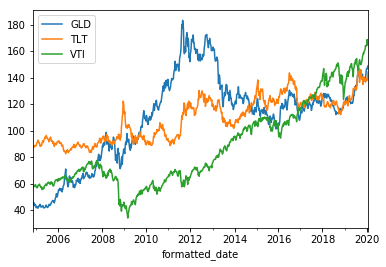

In [15]:
data.plot()

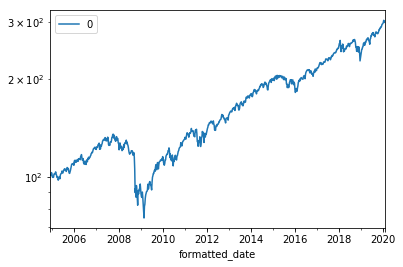

In [16]:
my_portfolio.plot(logy=True)

In [17]:
backtest = NaiveBackTest(minimal_variance(data).loc[0].to_dict(), data)

In [18]:
min_var_portfolio = backtest.run()

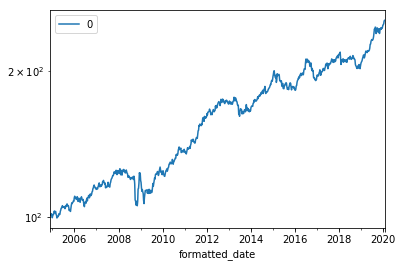

In [19]:
min_var_portfolio.plot(logy=True)

In [20]:
measures = MainMetrics(benchmark=data[['VTI']])

In [21]:
measures.estimate(data)

,GLD,TLT,VTI
alpha,0.082252,0.032849,0.072241
benchmark correlation,0.004257,-0.391121,1.000000
sharpe ratio,0.075195,0.043208,0.068622


In [22]:
MainMetrics(data[['VTI']]).estimate(min_var_portfolio)

,0
alpha,0.062916
benchmark correlation,0.449089
sharpe ratio,0.115580


In [23]:
MainMetrics(data[['VTI']]).estimate(my_portfolio)

,0
alpha,0.074089
benchmark correlation,0.985887
sharpe ratio,0.083588
